## IMPORT LIBRARIES

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## LOAD IMAGES

(-0.5, 227.5, 157.5, -0.5)

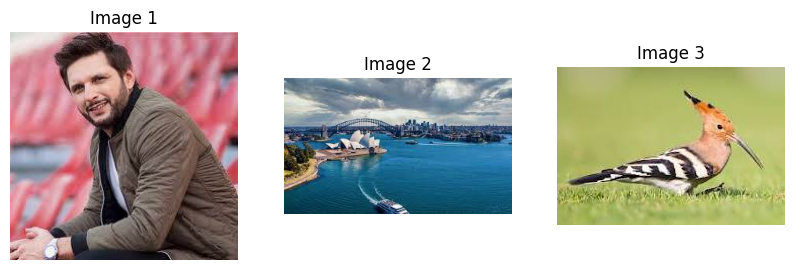

In [3]:
# Read three images as 3D NumPy arrays
image1 = cv2.imread('afridi.jpg')
image2 = cv2.imread('aus.jpg')
image3 = cv2.imread('hoopoe.jpg')

# show the images in subplots
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.title('Image 3')
plt.axis('off')


## K-MEANS ALGORITHM

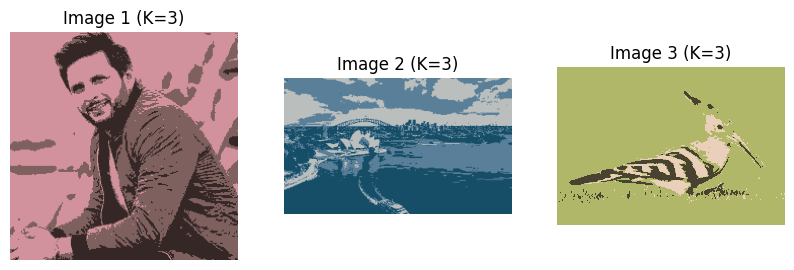

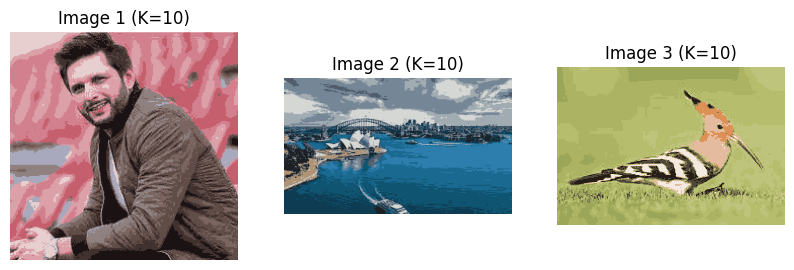

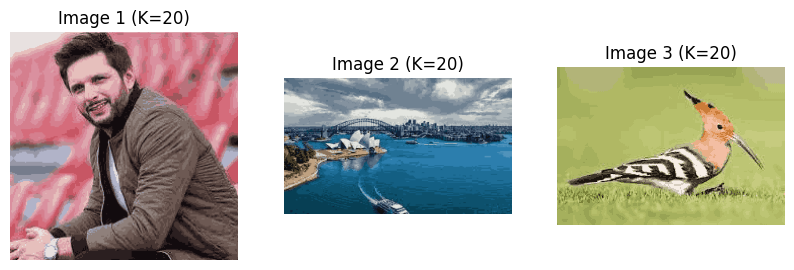

In [4]:
# Function to compute Euclidean distance between two sets of points
def euclidean_distance(X, Y):
    return np.sqrt(np.sum((X[:, None] - Y) ** 2, axis=-1))

# Function to initialize centroids randomly
def initialize_centroids(data, k):
    centroids_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[centroids_indices]
    return centroids

# Function to perform K-Means clustering
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        distances = euclidean_distance(data, centroids)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) if np.any(labels == i) else data[np.random.choice(len(data))] for i in range(k)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids

    return centroids, labels

# Function to read an image as a 3D NumPy array
def read_image(image_path):
    image_array = cv2.imread(image_path)
    return image_array

# Apply K-Means clustering to each image
k_values = [3, 10, 20]
for k in k_values:
    # Flatten each image into a 2D array
    flattened_image1 = image1.reshape(-1, 3)
    flattened_image2 = image2.reshape(-1, 3)
    flattened_image3 = image3.reshape(-1, 3)
    
    # Apply K-Means clustering
    centroids1, labels1 = kmeans(flattened_image1, k)
    centroids2, labels2 = kmeans(flattened_image2, k)
    centroids3, labels3 = kmeans(flattened_image3, k)
    
    # Reconstruct clustered images
    clustered_image1 = centroids1[labels1].reshape(image1.shape)
    clustered_image2 = centroids2[labels2].reshape(image2.shape)
    clustered_image3 = centroids3[labels3].reshape(image3.shape)
    
    # Display the clustered images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(clustered_image1.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title('Image 1 (K={})'.format(k))
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(clustered_image2.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title('Image 2 (K={})'.format(k))
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(clustered_image3.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title('Image 3 (K={})'.format(k))
    plt.axis('off')
    
    plt.show()
